# 00 - A simple data plotting script
---
Assuming basic familarity with the Jupyter Notebook interface, one can use this script to make a plot of a simulation output. This involves importing the function that reads the data, loading the data into a dictionary, and using `matplotlib` to view some of the data.

Press <kbd>Shift</kbd> + <kbd>Enter</kbd> to run each cell below.

In [3]:
# Import the function "athdf" from athena_read.py
# This function takes in a filename and loads all the data into a dictionary,
# which stores information via key and value pairs.
from athena_read import athdf

In [4]:
# Import matplotlib.pyplot and give it the shortcut name "plt".
# This is the Python library that allows us to plot figures.
import matplotlib.pyplot as plt
%matplotlib inline

# We also want numpy for math functions
import numpy as np

In [94]:
# Assign the output of the "athdf" function to a new variable
simulation_data = []
for i, bsq in enumerate([0, 5, 10, 15, 20]):
    simulation_data.append(athdf("../data/ba-bsq{:1d}/gr_bondi.out1.00001.athdf".format(bsq)))

In [95]:
# Use plt to plot the 'rho' key from the simulation_data dictionary.
# This contains the density data, stored as a 2D array.

#radius = simulation_data['x1v']
#density = simulation_data['rho'][0][0]

#plt.plot(radius, density, marker='o')
#plt.yscale('log')
#plt.show()

Great! This is a plot of the density as a function of gravitational radius. We can see that the density is high nearer to the black hole, and drops off exponentially as we go further away from it.

We want to get the mass accretion rate, which requires a couple calculations using the density and pressure at the very outer boundary of the simulation. Follow along with the comments below to understand how we arrive at a final number for the mass accretion rate.

In [96]:
# Get p_inf, the pressure at infinity (an index of minus 1 grabs the *last* data point in the array)
#p_inf = simulation_data['press'][0][0][-1]

# Get rho_inf, the density at infinity
#rho_inf = simulation_data['rho'][0][0][-1]

# Adiabatic index

# Calculate sound speed at infinity
#c_inf = np.sqrt(gamma * p_inf / rho_inf)


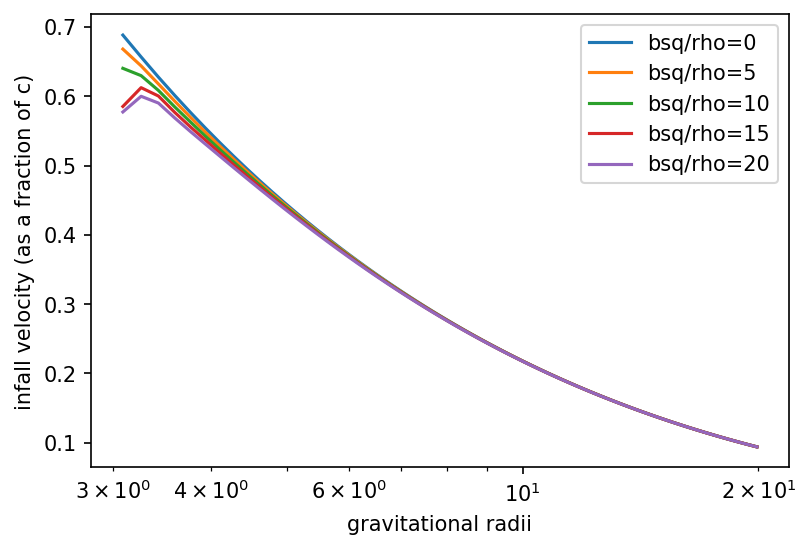

In [145]:
gamma = 1.333333333333333
c_light = 3e10
n = 1 / (gamma - 1)
fig = plt.figure(dpi=150)
for i, bsq in enumerate([0, 5, 10, 15, 20]):
    rho = simulation_data[i]['rho'][0,0]
    ur = simulation_data[i]['vel1'][0,0]
    press = simulation_data[i]['press'][0][0]
    r = simulation_data[i]['x1v']

    Tn = (press / rho)**n
    c1 = -0.00675
    u1 = c1 / r**2 / Tn
    y = np.sqrt(1 - 2/r + u1**2)
    local_vel = u1/y
    plt.plot(r, -local_vel, label='bsq/rho={:1d}'.format(bsq))

plt.xlabel('gravitational radii')
plt.ylabel('infall velocity (as a fraction of c)')
plt.xscale('log')
plt.legend()
plt.show()

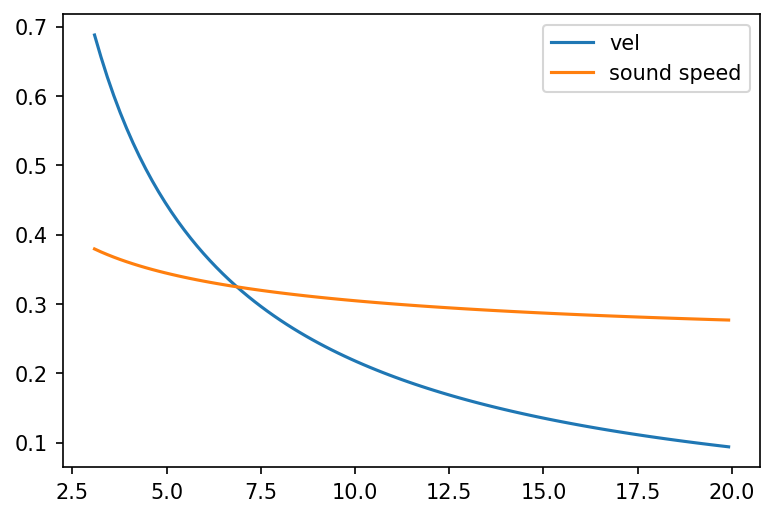

In [150]:
rho = simulation_data[0]['rho'][0,0]
ur = simulation_data[0]['vel1'][0,0]
press = simulation_data[0]['press'][0][0]
r = simulation_data[0]['x1v']

Tn = (press / rho)**n
c1 = -0.00675
u1 = c1 / r**2 / Tn
y = np.sqrt(1 - 2/r + u1**2)
local_vel = u1/y

cs = np.sqrt(gamma * press / rho)

plt.figure(dpi=150)
plt.plot(r, -local_vel, label='vel')
plt.plot(r, cs, label='sound speed')
plt.legend()
plt.show()